# PC1 comparison


In [8]:
import os
import sys
import torch
import numpy as np

In [18]:
# Model configurations
MODELS = {
    'gemma-2-27b': {'layer': 22, 'total_layers': 46, 'display_name': 'Gemma'},
    'qwen-3-32b': {'layer': 32, 'total_layers': 64, 'display_name': 'Qwen'},
    'llama-3.3-70b': {'layer': 40, 'total_layers': 80, 'display_name': 'Llama'},
    
}

In [13]:
# Load data and compute cosine similarity for all models
cosine_sims = {}

for model_name, config in MODELS.items():
    base_dir = f"/workspace/{model_name}/roles_240"
    contrast_vecs = torch.load(f"{base_dir}/contrast_vectors.pt")
    pc1_vecs = torch.load(f"{base_dir}/pc1_vectors.pt")
    
    contrast_np = contrast_vecs.float().numpy()
    pc1_np = pc1_vecs.float().numpy()
    
    cosine_sim = np.sum(contrast_np * pc1_np, axis=1) / (
        np.linalg.norm(contrast_np, axis=1) * np.linalg.norm(pc1_np, axis=1)
    )
    cosine_sims[model_name] = cosine_sim
    print(f"{model_name}: {cosine_sims[model_name].shape}")

gemma-2-27b: (46,)
qwen-3-32b: (64,)
llama-3.3-70b: (80,)


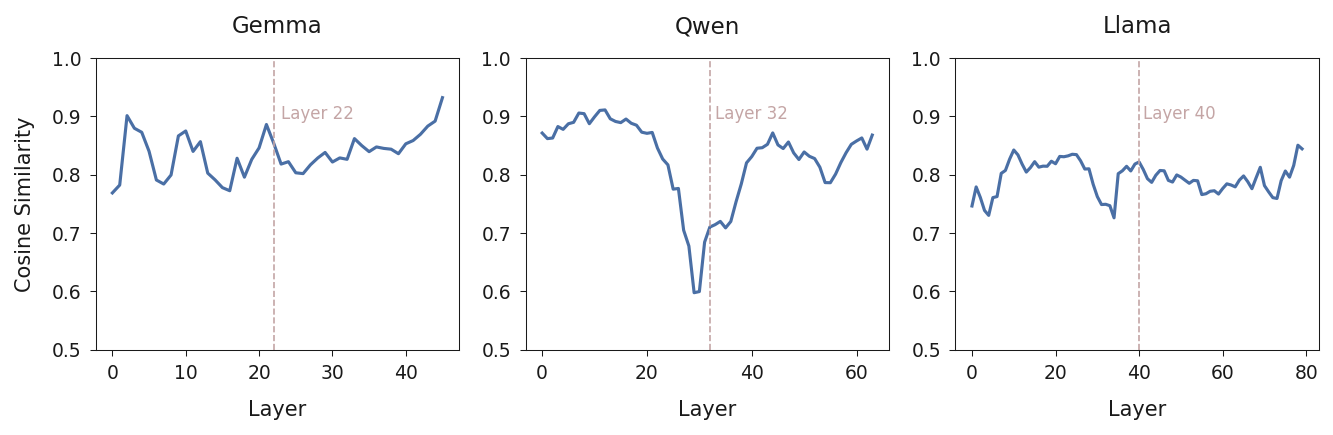

In [19]:
import matplotlib.pyplot as plt
plt.style.use('./arena.mplstyle')

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

for i, (model_name, config) in enumerate(MODELS.items()):
    ax = axes[i]
    total_layers = config['total_layers']
    layer = config['layer']
    
    # Plot line
    ax.plot(range(total_layers), cosine_sims[model_name], color='#4a6fa5', linewidth=1.5)
    
    # Annotate target layer with vertical line
    ax.axvline(x=layer, color='#c4a5a5', linestyle='--', linewidth=0.8)
    ax.text(layer + 1, 0.92, f'Layer {layer}', fontsize=8, color='#c4a5a5', va='top')
    
    # Labels
    ax.set_xlabel('Layer')
    if i == 0:
        ax.set_ylabel('Cosine Similarity')
    
    ax.set_title(config['display_name'], loc='center')
    ax.set_ylim(0.5, 1)
    
    # Outer box border
    for spine in ax.spines.values():
        spine.set_visible(True)

plt.tight_layout()

# Save
plot_output_dir = "/root/git/plots/paper"
os.makedirs(plot_output_dir, exist_ok=True)
plt.savefig(f"{plot_output_dir}/appendix_pc1_cosine_sim.pdf", dpi=300, bbox_inches='tight')
plt.show()